In [31]:
import urllib.request as ulr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
key = '15W_4Hy_Ce3bg3nq30XwFdi9D0kEKEgQqTg754h6dKPc'
sheet_name = 'SunBotLog'
url = f'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
ulr.urlretrieve(url, 'light_data.csv')

('light_data.csv', <http.client.HTTPMessage at 0x235b98f68e0>)

In [3]:
df = pd.read_csv('light_data.csv', parse_dates=['Date'])
df

,Date,Time,Lux
0,2021-12-24,14:15,5.877434
1,2021-12-24,14:30,8.262641
2,2021-12-24,14:45,11.938087
3,2021-12-24,15:00,11.026970
4,2021-12-24,15:15,7.253550
...,...,...,...
4356,2022-02-13,11:45,42.963160
4357,2022-02-13,12:00,41.291680
4358,2022-02-13,12:15,40.714310
4359,2022-02-13,12:30,41.858270


In [29]:
light = df.set_index([df['Date'].dt.isocalendar().week, df['Date'].dt.weekday])
light.index.names = ['week', 'day']
light = light.drop('Date', axis=1)
light

Time        Lux
week day                  
51   4    14:15   5.877434
     4    14:30   8.262641
     4    14:45  11.938087
     4    15:00  11.026970
     4    15:15   7.253550
...         ...        ...
6    6    11:45  42.963160
     6    12:00  41.291680
     6    12:15  40.714310
     6    12:30  41.858270
     6    12:45  41.858270

[4361 rows x 2 columns]

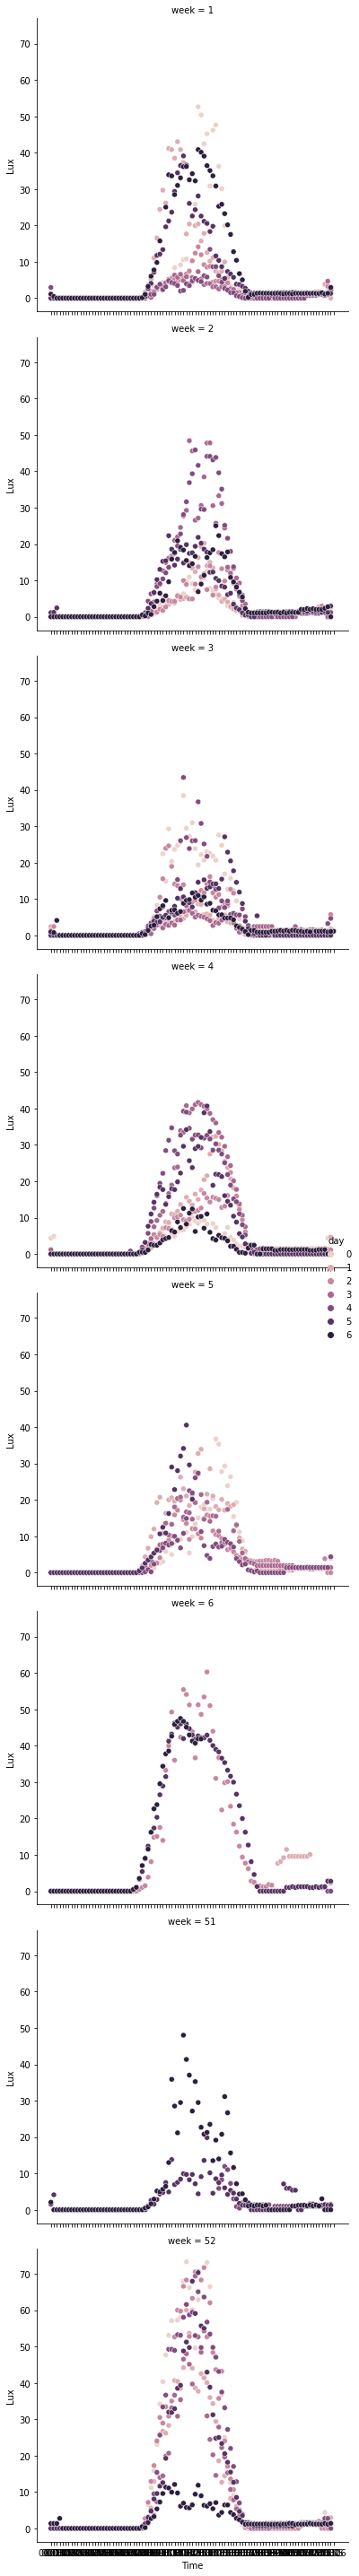

In [37]:
g = sns.relplot(data=light, kind='scatter', x='Time', y='Lux', hue='day', row='week')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Time'>

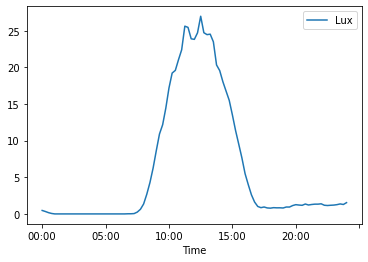

In [38]:
light.groupby('Time').mean().plot()

<AxesSubplot:xlabel='Time'>

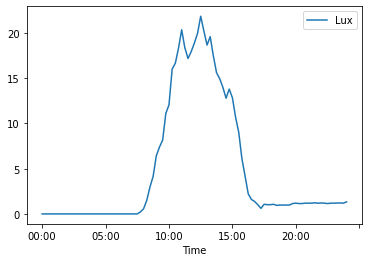

In [39]:
light.groupby('Time').median().plot()